In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('./SAHeart.csv')
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [8]:
# 1.How many records are present in the dataset? Print the metadata information of the dataset.
print(f"Number of records in the dataset {df.shape[0]}")
df.info()

Number of records in the dataset 462
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


<Axes: xlabel='famhist', ylabel='chd'>

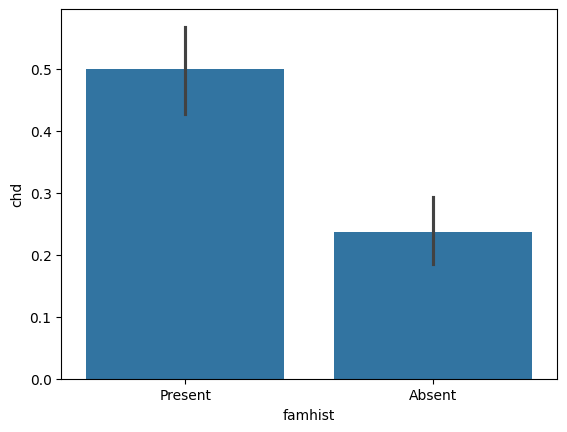

In [13]:
# 2.Draw the barplot to show the number of persons having CHD or not in comparision to they having family history of disease or not.
sns.barplot(x='famhist',y='chd',data=df)

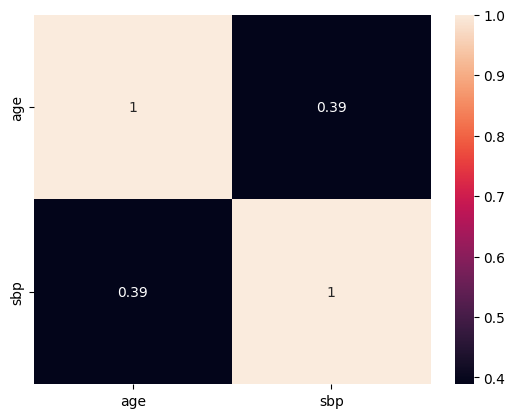

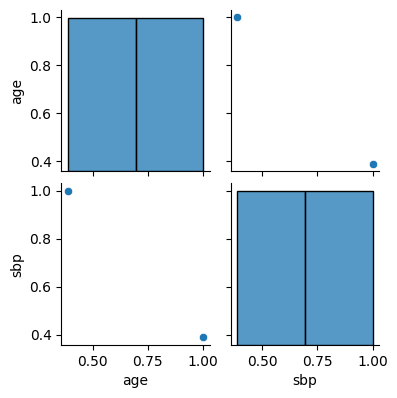

In [18]:
# 3.Does age have any correlation with sbp? choose approprioate plot to show the relationship
sns.heatmap(df[['age','sbp']].corr(),annot=True)
sns.pairplot(df[['age','sbp']].corr(), height=2)

Text(0.5, 1.0, 'Distribution of Tobacco Consumption by CHD Status')

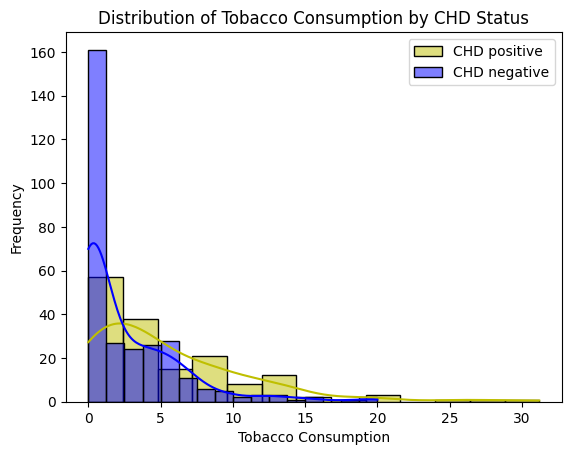

In [32]:
# 4.Compare the distribution of tobacco consumption for persons having the chd and no having the chd.
# can you interpret the effect of tobacco consumption on having the coronory heard disease
sns.histplot(df[df['chd']==1]['tobacco'],color='y',label="CHD positive",kde=True)
sns.histplot(df[df['chd']==0]['tobacco'],color='b',label="CHD negative",kde=True)
plt.legend()
plt.xlabel('Tobacco Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Tobacco Consumption by CHD Status')

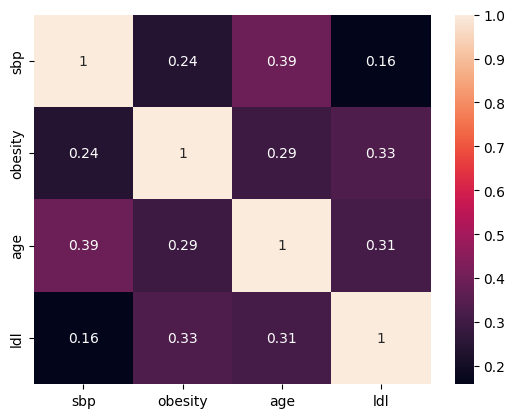

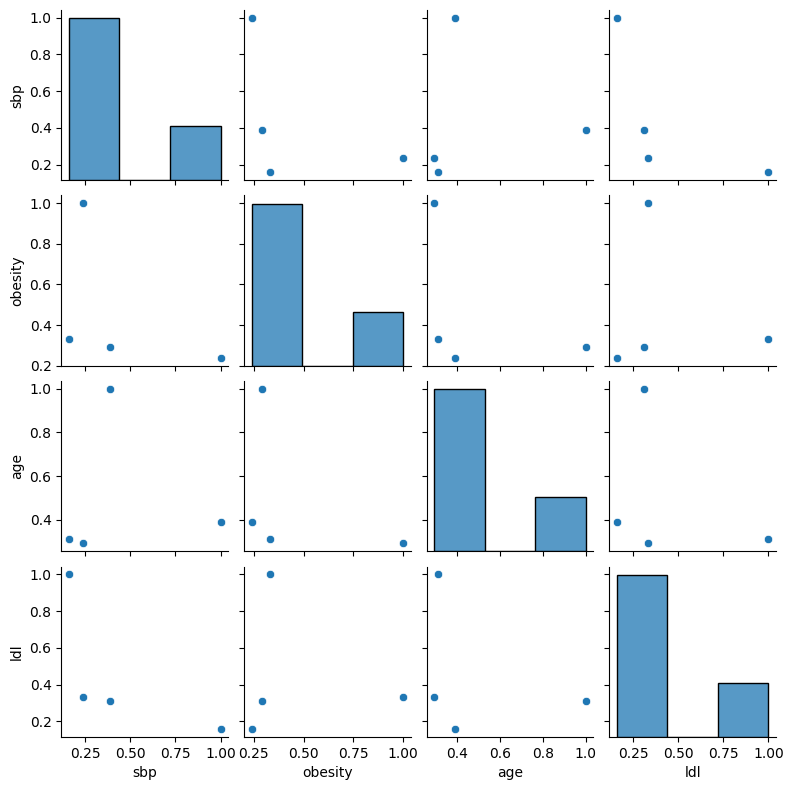

In [35]:
# 5.How are parameters sbp, obesity, age and ldl correlated? choose the right plot to show the relationships
sns.heatmap(df[['sbp','obesity','age','ldl']].corr(),annot=True)
sns.pairplot(df[['sbp','obesity','age','ldl']].corr(),height=2)

In [47]:
# 6.Derive the new column called agegroup from the age column where persons falling in different age ranges are categorized as below
# 0-15 --> young
# 15-35 --> adults
# 35 -55 --> mid
# 55- -->old
def agegroup(age):
    if 0<age<=15:
        return "young"
    elif 15<age<=35:
        return "adults"
    elif 35<age<=55:
        return "mid"
    elif age>55:
        return "old"
df['agegroup'] = df['age'].apply(agegroup)

Text(0.5, 1.0, 'Count of CHD by Age Group')

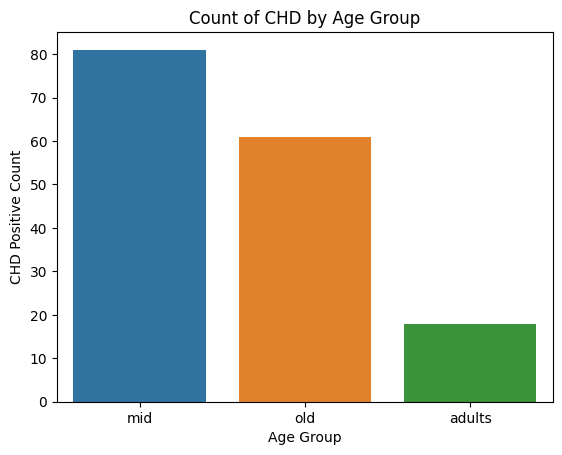

In [75]:
# 7.Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups
chd_age = df[df['chd']==1].groupby('agegroup')['chd'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(x='agegroup',y='count',data=chd_age,hue="agegroup")
plt.xlabel("Age Group")
plt.ylabel("CHD Positive Count")
plt.title('Count of CHD by Age Group')

Text(0.5, 1.0, 'Age Group vs LDL')

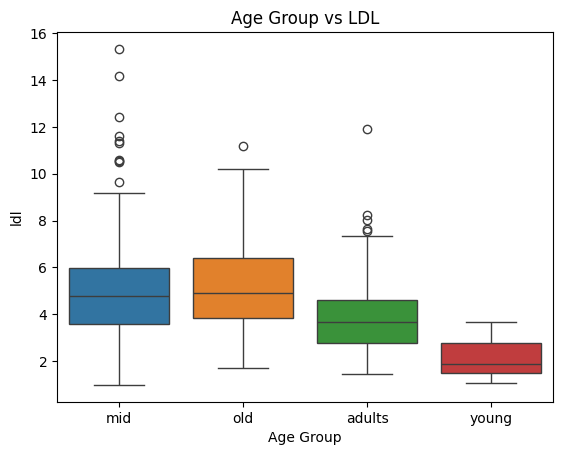

In [76]:
# 8.Draw a box plot to compare distributions of ldl for different age groups
sns.boxplot(x='agegroup',y='ldl',data=df,hue='agegroup')
plt.xlabel('Age Group')
plt.ylabel('ldl')
plt.title('Age Group vs LDL')